# Gradient Descent

In this notebook, we introduce the gradient descent algorithm and implement it by scratch.

---

## Introduction

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

---

## Algorithm

Gradient descent is based on the observation that id if a function $f(x)$ is defined and differentiable in a neighborhood of a point $a$, then $f(x)$ decreases *fastest* if one goes from $a$ in the direction of the negative gradient of $f$ at $a$, $-f'(a)$. It follows that if 

$$
a_{n+1} = a_n - \gamma f'(a_n),
$$

for a small enough step size or learning rate $\gamma > 0$, then 

$$
f(a_{n+1}) \le f(a_n).
$$

With this observation in mind, one starts with a guess $x_0$ for a local minimum of $f$, and considers the sequence $x_1,\,x_2,\dots$ such that

$$
x_{n+1} = x_n - \gamma f'(x_n),\,n\ge 0 .
$$

We have a monotonic sequence

$$
f(x_0) \ge f(x_1) \ge f(x_2) \ge \cdots.
$$

So, hopefully, the sequence $\{x_n\}$ converges to the desired local minimum.

---

## Coding

In this part, I'll build the gradient descent function by scratch and implemnt it on a few single-variable or multi-variable functions in order to get the minimum values.

In [5]:
# Gradeint descent algorithm
def gradient_descent(df, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while np.linalg.norm(df(W)) > 0.001 and i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

We will first implement the gradient descent on a simple single-variable function 
$$
f(x) = x^2.
$$
We import the libraries and define the test function and its derivative.

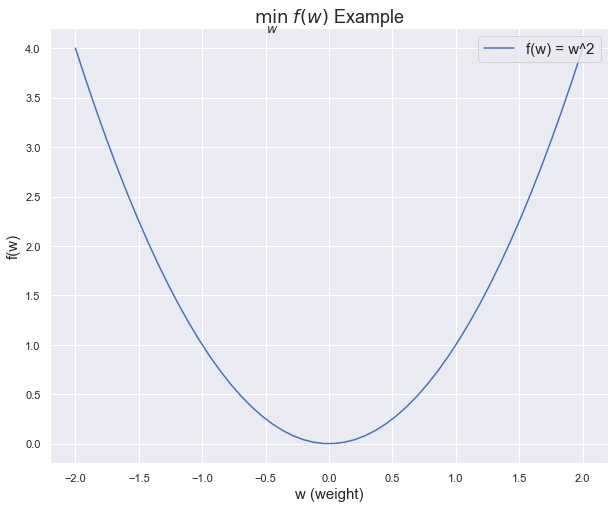

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return w**2

# Define derivative function
def df(w):
    return 2*w 

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Define domain for plotting f
domain = np.linspace(-2, 2, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w^2")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

C:\Users\lyl98\AppData\Local\Temp/ipykernel_28884/591151777.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


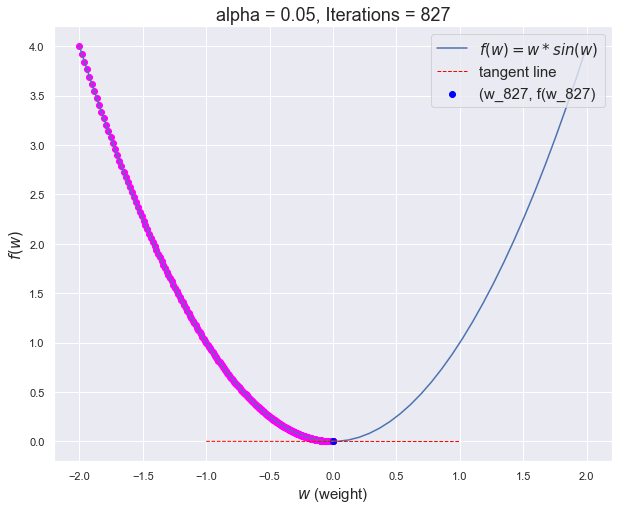

In [9]:
# Let w0 = -2, alpha = 0.005
W = gradient_descent(df = df, W = -2, alpha = 0.005)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w*sin(w)$")
for i in range(len(W)):
    plt.scatter(W[i], f(W[i]), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title(f"alpha = 0.05, Iterations = {len(W)}", fontsize = 18)
plt.show()


On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution.

C:\Users\lyl98\AppData\Local\Temp/ipykernel_28884/591151777.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


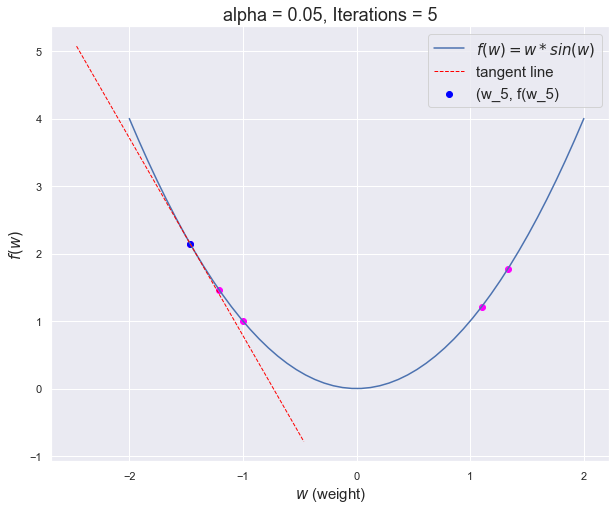

In [18]:
# Let w0 = -1, alpha = 1.05
W = gradient_descent(df = df, W = -1, alpha = 1.05, max_iter=4)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w*sin(w)$")
for i in range(len(W)):
    plt.scatter(W[i], f(W[i]), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title(f"alpha = 0.05, Iterations = {len(W)}", fontsize = 18)
plt.show()

Finally, not all cost functions look like nice, regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult. The following two examples show the main challenges with Gradient Descent.

The single-variable function I choose is:
$$
f(x) = x*sin(x).
$$

And we know the derivative of $f$ is:

$$
f'(x) = sin(x) + x*cos(x).
$$

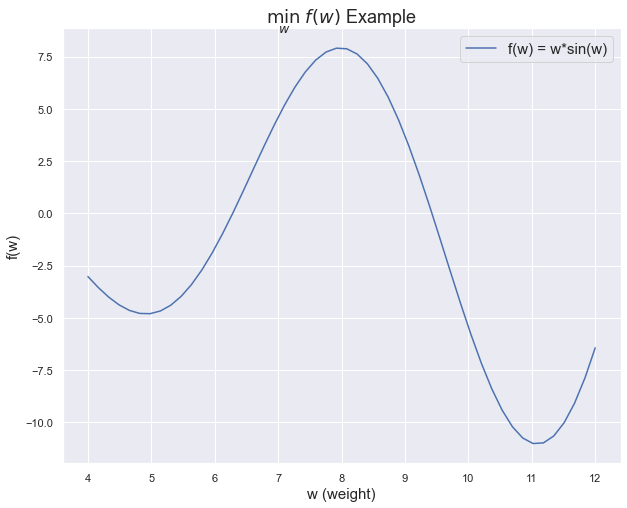

In [20]:
# Define the test function
def f(w):
    return w*np.sin(w)

# Define the derivative
def df(w):
    return np.sin(w) + w*np.cos(w)

# Define the domain
domain = np.linspace(4, 12, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w*sin(w)")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

We can observe that the minimum value points of our target function are not unique. Therefore, different start points may lead to different local minimum.

C:\Users\lyl98\AppData\Local\Temp/ipykernel_28884/591151777.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


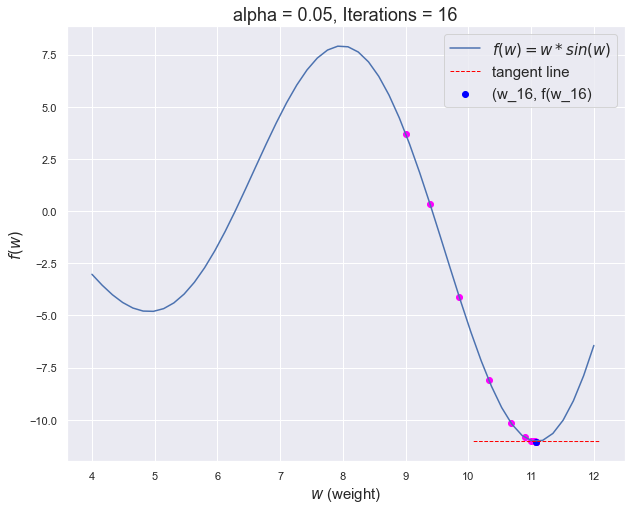

In [21]:
# Let w0 = 9.0, alpha = 0.05
W = gradient_descent(df = df, W = 9.0, alpha = 0.05)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w*sin(w)$")
for i in range(len(W)):
    plt.scatter(W[i], f(W[i]), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title(f"alpha = 0.05, Iterations = {len(W)}", fontsize = 18)
plt.show()


C:\Users\lyl98\AppData\Local\Temp/ipykernel_28884/591151777.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


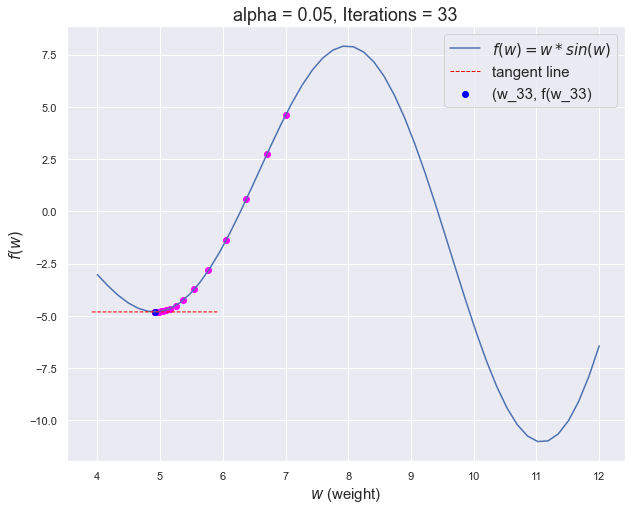

In [23]:
# Now let w0 = 7.0
W = gradient_descent(df = df, W = 7.0, alpha = 0.05)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w*sin(w)$")
for i in range(len(W)):
    plt.scatter(W[i], f(W[i]), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title(f"alpha = 0.05, Iterations = {len(W)}", fontsize = 18)
plt.show()

We can see that the sequence converges to another local minimum. Thus gradient descent cannot guarantee that it will converge to the global minimum point. In this case, we need to be careful about choosing the initial value.

The third example function I choose is:
$$
f(x) = -(x-2)^3.
$$

The derivative is:

$$
f'(x) = -3(x-2)^2.
$$

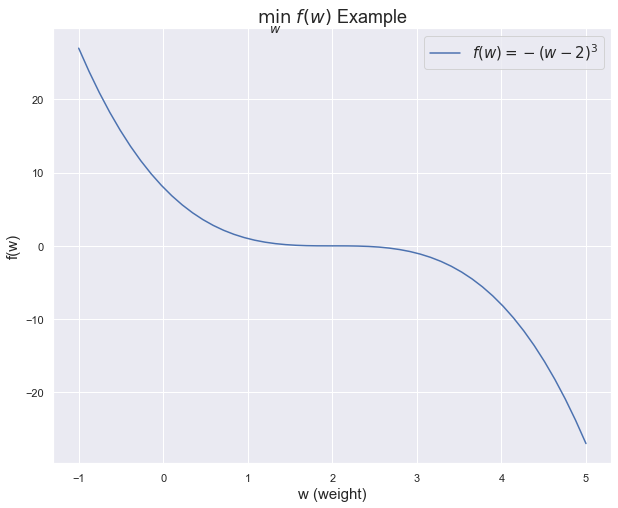

In [24]:
# Define test function for experimenting
def f(w):
    return -(w-2)**3

# Define derivative function
def df(w):
    return -3*(w-2)**2

# Define domain variables for plotting f
domain = np.linspace(-1, 5, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = -(w-2)^3$")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

We can observe that this function has a saddle point and doesn't have a local minimum. 

C:\Users\lyl98\AppData\Local\Temp/ipykernel_28884/591151777.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


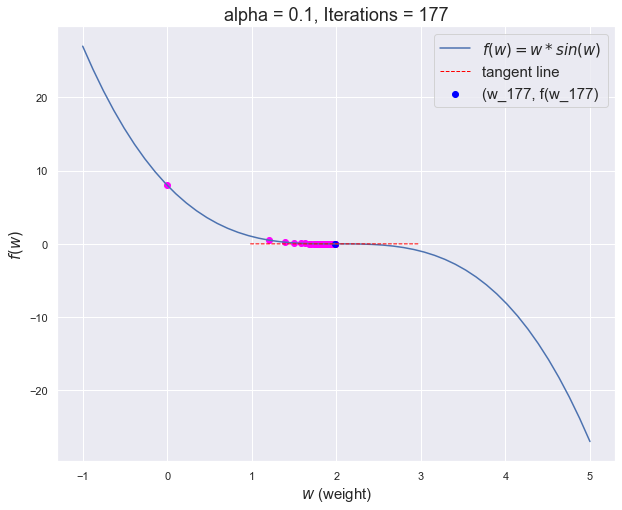

In [25]:
W = gradient_descent(df = df, W = 0, alpha = 0.1)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w*sin(w)$")
for i in range(len(W)):
    plt.scatter(W[i], f(W[i]), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title(f"alpha = 0.1, Iterations = {len(W)}", fontsize = 18)
plt.show()

We can see that the gradient descent converged to the saddle point. Therefore the presence of saddle point might also cause the failure of gradient descent.

To show that Gradient Descent method can also be applied on Multivariable function. I define a function and its gradient as below:
$$
f(x,y) = 2x^2 + y^2.
$$

The gradient of $f$ is:

$$
df(x,y) = (4x, 2y)^{\top}.
$$

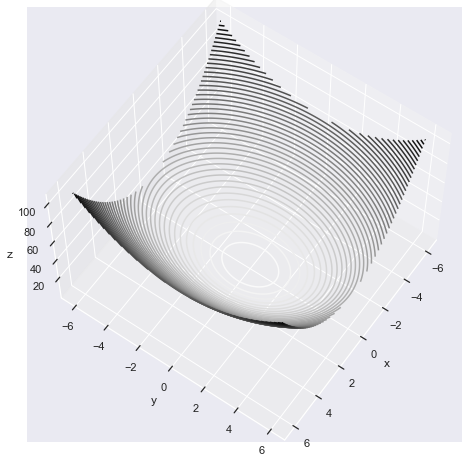

In [26]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return 2*w_0**2 + w_1**2

def df(w):
    grad = [4*w[0], 2*w[1]]
    return np.array(grad)

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(60, 35)
plt.show()

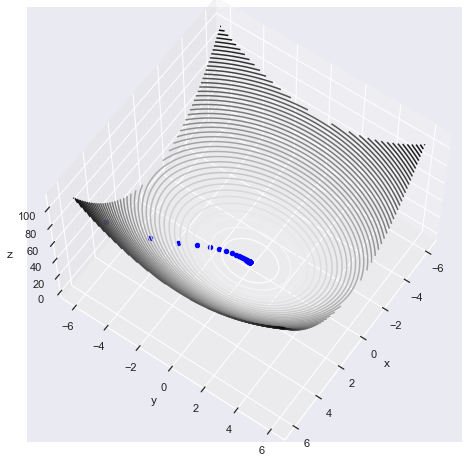

In [27]:
W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

## Conclusion

As we have demonstrated in this notebook, gradient descent is a simple way to optimize convex functions, while it might fail in the scenario that the target function have multiple minimum points or saddle points.